# Redes Neurais Recorrentes

As redes neurais recorrentes são as redes que possuem uma realimentação dos neurônios de saída para a entrada da rede. Elas são apropriadas para o processamento de sequências.
São muito utilizadas no processamento de textos.

A figura a seguir mostra uma rede recorrente simples contendo:
- 2 entradas
- 4 neurônios de saídas
- 1 bias

<img src='../figures/RNN_2_3_4_template.png',width=300pt></img>

Se configurarmos esta rede para processar 3 instantes de tempo (de duas entradas cada), teremos a 
rede equivalente conforme figura a seguir:

<img src='../figures/RNN_2_3_4.png',width=500pt></img>

Os parâmetros da rede são os mesmos para cada instante de tempo.
O número total de parâmetros que precisam ser treinados nesta rede são:
- 2 x 4 = parâmetros da rede de entrada (2 entradas x 4 saídas)
- 4 = bias da rede de entrada (um parâmetro para cada saída)
- 4 = bias da rede recorrente
- 4 x 4 = parâmetros da rede recorrente (4 entradas x 4 saídas)

**Obs:** Não haveria necessidade de dois bias, pois eles podem ser combinados num único.
Entretanto a implementação do PyTorch é assim e a explicação deles é que eles utilizam
a implementação da Nvidia no cuda cuNN.

## Representação em diagrama de blocos

Uma outra representação gráfica das redes recorrentes é conforme a representação abaixo:

<table align='left'>
<tr><td> <img src="../figures/rnn_2.png"> </td></tr>
</table>

## Objetivos deste experimento

Este notebook é uma demonstração da construção desta rede utilizando valores numéricos
para poder melhor entender o funcionamento da rede recorrente.

## Importação

In [1]:
import numpy as np

import torch
from torch.autograd import Variable

In [2]:
rnn = torch.nn.RNN(2, 4, 1, nonlinearity='relu') # 2 features, 4 neurônios, 1 camada
xin = Variable(torch.randn(3, 1, 2)) # 1 amostra, 3 sequências, 2 features
print('xin:', xin.data)
yout, hn = rnn(xin)
print('yout:',yout.data)
print('hn:', hn.data)

xin: 
(0 ,.,.) = 
  0.0184  0.2820

(1 ,.,.) = 
  0.6967 -0.6171

(2 ,.,.) = 
  1.0328  0.0406
[torch.FloatTensor of size 3x1x2]

yout: 
(0 ,.,.) = 
  0.0337  0.0000  0.2597  0.5619

(1 ,.,.) = 
  0.0000  0.3750  0.1368  0.7219

(2 ,.,.) = 
  0.0000  0.6709  0.3625  0.9509
[torch.FloatTensor of size 3x1x4]

hn: 
(0 ,.,.) = 
  0.0000  0.6709  0.3625  0.9509
[torch.FloatTensor of size 1x1x4]



## Visualizando os parâmetros

In [3]:
rnn.state_dict()

OrderedDict([('weight_ih_l0', 
              -0.0027 -0.2038
               0.3831 -0.0940
              -0.3152  0.2524
               0.3623 -0.0539
              [torch.FloatTensor of size 4x2]), ('weight_hh_l0', 
              -0.0030  0.2634 -0.4681 -0.1825
               0.3516  0.3127 -0.4496  0.4259
              -0.4130  0.3344  0.3461  0.4305
              -0.2364  0.3693 -0.1631 -0.1493
              [torch.FloatTensor of size 4x4]), ('bias_ih_l0', 
               0.1563
               0.4024
              -0.0261
               0.4029
              [torch.FloatTensor of size 4]), ('bias_hh_l0', 
              -0.0650
              -0.4867
               0.2204
               0.1675
              [torch.FloatTensor of size 4])])

## Colocando os parâmetros

### Pesos e Bias da rede de entrada

In [4]:
w_ih = np.array([
    [ 1., 2.,  3., 4. ],
    [ 5,  6.,  7., 8]])
bias_ih = np.array(
    [ 0.1,  0.2,  0.3,  0.4])

### Pesos e Bias da rede recorrente

In [5]:
w_hh = np.array([
    [ 1.,  0.,  0.,  0.],
    [ 0.,  1.,  0.,  0.],
    [ 0.,  0.,  1.,  0.],
    [ 0.,  0.,  0.,  1.]])
bias_hh = np.array(
    [ -0.,  -0.,  -0.,  -0.])

In [6]:
w_dict = {'weight_ih_l0': torch.FloatTensor(w_ih.T),
          'weight_hh_l0': torch.FloatTensor(w_hh.T),
          'bias_ih_l0':   torch.FloatTensor(bias_ih),
          'bias_hh_l0':   torch.FloatTensor(bias_hh)}

In [7]:
rnn.load_state_dict(w_dict)
rnn.state_dict()

OrderedDict([('weight_ih_l0', 
               1  5
               2  6
               3  7
               4  8
              [torch.FloatTensor of size 4x2]), ('weight_hh_l0', 
               1  0  0  0
               0  1  0  0
               0  0  1  0
               0  0  0  1
              [torch.FloatTensor of size 4x4]), ('bias_ih_l0', 
               0.1000
               0.2000
               0.3000
               0.4000
              [torch.FloatTensor of size 4]), ('bias_hh_l0', 
              -0
              -0
              -0
              -0
              [torch.FloatTensor of size 4])])

## Colocando a entrada

A entrada é formada por 2 amostras de 3 sequências de 2 atributos:

In [8]:
x_in = np.array([[[1.,1],[0,0],[0,0]],
                 [[1.,0],[2,1],[3,1]]])

x = Variable(torch.FloatTensor(x_in)) # torch.randn(2, 3, 2)) # 2 amostras, 3 sequências, 2 features
print('x:', x.data)

x: 
(0 ,.,.) = 
  1  1
  0  0
  0  0

(1 ,.,.) = 
  1  0
  2  1
  3  1
[torch.FloatTensor of size 2x3x2]



In [9]:
y,h1 = rnn(x)
print('y:',y)
print('h1:',h1)

y: Variable containing:
(0 ,.,.) = 
   6.1000   8.2000  10.3000  12.4000
   0.1000   0.2000   0.3000   0.4000
   0.1000   0.2000   0.3000   0.4000

(1 ,.,.) = 
   7.2000  10.4000  13.6000  16.8000
   7.2000  10.4000  13.6000  16.8000
   8.2000  12.4000  16.6000  20.8000
[torch.FloatTensor of size 2x3x4]

h1: Variable containing:
(0 ,.,.) = 
   7.2000  10.4000  13.6000  16.8000
   7.2000  10.4000  13.6000  16.8000
   8.2000  12.4000  16.6000  20.8000
[torch.FloatTensor of size 1x3x4]



## Exercícios

1. Simular numericamente os valores da rede recorrente para comprovar
   os valores dos experimentos feitos
2. Suponha que a sequência para a rede RNN seja um sinal temporal como a 
   senoide abaixo. Modifique a rede para que a entrada seja uma sequência de 
   100 pontos. Plote o valor médio dos quatro neurônios a cada instante e o 
   valor final dos quatro neurônios. 

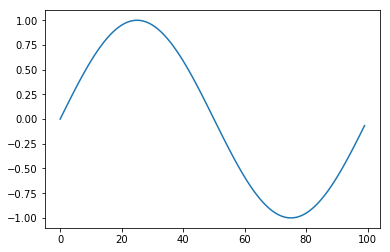

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

i = torch.arange(0,100)
xin = torch.sin(i * 2 * 3.14/100)
plt.plot(xin.numpy())